* Dogecoin is a cryptocurrency created by software engineers Billy Markus and Jackson Palmer, who decided to create a payment system as a joke, making fun of the wild speculation in cryptocurrencies at the time. Despite its satirical nature, some consider it a legitimate investment prospect.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
dodge = pd.read_csv('C:/Users/user/datasets/DOGE-USD.csv')
dodge.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,539140.0


In [3]:
print(f'This dataset has {dodge.shape[0]} rows and {dodge.shape[1]} columns')

This dataset has 2643 rows and 6 columns


In [4]:
dodge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2643 non-null   object 
 1   Open    2639 non-null   float64
 2   High    2639 non-null   float64
 3   Low     2639 non-null   float64
 4   Close   2639 non-null   float64
 5   Volume  2639 non-null   float64
dtypes: float64(5), object(1)
memory usage: 124.0+ KB


In [5]:
dodge.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95])

,Open,High,Low,Close,Volume
count,2639.000000,2639.000000,2639.000000,2639.000000,2.639000e+03
mean,0.028527,0.030491,0.026601,0.028594,5.889221e+08
std,0.083359,0.090088,0.076759,0.083463,2.937576e+09
min,0.000087,0.000089,0.000085,0.000087,1.669500e+04
5%,0.000130,0.000134,0.000127,0.000130,6.049480e+04
10%,0.000150,0.000156,0.000145,0.000151,9.223200e+04
25%,0.000228,0.000234,0.000224,0.000229,2.738350e+05
50%,0.002266,0.002342,0.002185,0.002268,1.362440e+07
75%,0.003388,0.003505,0.003247,0.003391,7.694970e+07
90%,0.058547,0.062009,0.056128,0.058678,1.145248e+09


In [6]:
dodge.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
dodge.drop("Volume", axis = 1)

,Date,Open,High,Low,Close
0,2014-09-17,0.000293,0.000299,0.000260,0.000268
1,2014-09-18,0.000268,0.000325,0.000267,0.000298
2,2014-09-19,0.000298,0.000307,0.000275,0.000277
3,2014-09-20,0.000276,0.000310,0.000267,0.000292
4,2014-09-21,0.000293,0.000299,0.000284,0.000288
...,...,...,...,...,...
2638,2021-12-07,0.178374,0.183539,0.175505,0.176805
2639,2021-12-08,0.176609,0.182168,0.172630,0.179151
2640,2021-12-09,0.178961,0.181890,0.169484,0.169484
2641,2021-12-10,0.169466,0.174610,0.164065,0.164422


In [8]:
plt.style.use('ggplot')

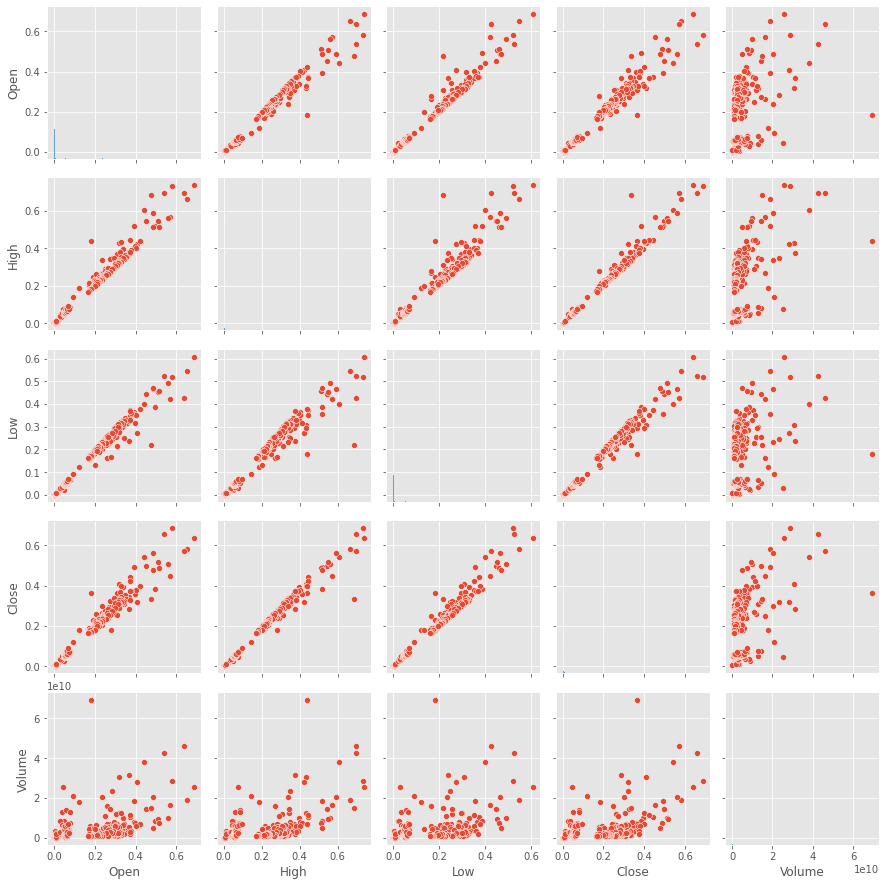

In [9]:
sns.pairplot(dodge)

In [10]:
corr = dodge.corr()
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.994357,0.994091,0.992905,0.597558
High,0.994357,1.000000,0.987536,0.995421,0.656742
Low,0.994091,0.987536,1.000000,0.994983,0.566572
Close,0.992905,0.995421,0.994983,1.000000,0.629636
Volume,0.597558,0.656742,0.566572,0.629636,1.000000


<AxesSubplot:>

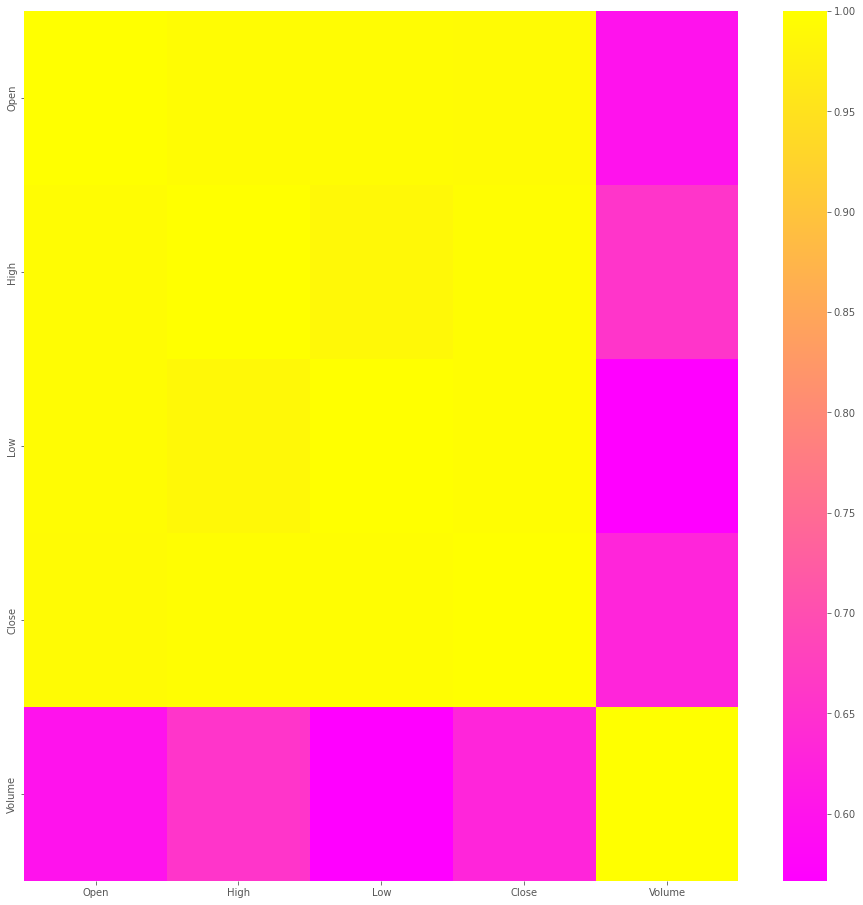

In [11]:
f,ag=plt.subplots(figsize=(16,16))
sns.heatmap(corr, cmap="spring")

Text(0.5, 1.0, 'Volume of Doge Coin on Opening By Date')

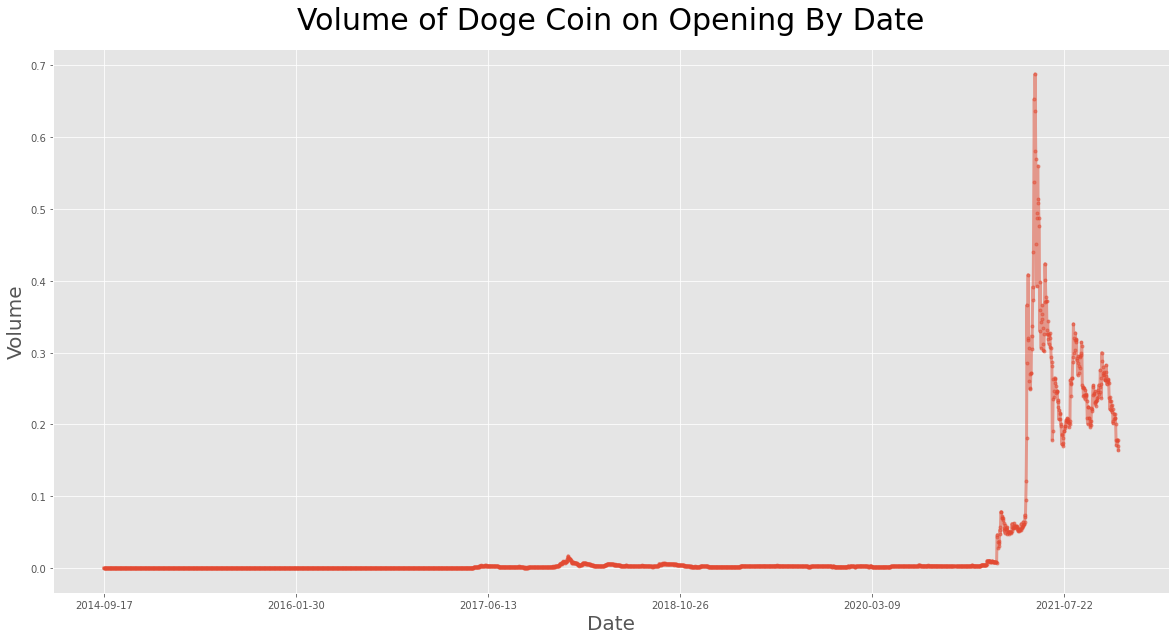

In [12]:
plt.figure(figsize = (20,10))
plt.style.use("ggplot")
dodge.groupby('Date')['Open'].mean().plot(marker='o',ls='-',lw=3,ms=3,mew=1,alpha=.5)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.title("Volume of Doge Coin on Opening By Date", pad=20, fontsize=30)          

In [13]:
# Its trend in first fifteen days
first_15_days = dodge.head(15)
first_15_days

,Date,Open,High,Low,Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,539140.0
5,2014-09-22,0.000288,0.000301,0.000285,0.000298,620222.0
6,2014-09-23,0.000298,0.000318,0.000295,0.000313,739197.0
7,2014-09-24,0.000314,0.000353,0.000310,0.000348,1277840.0
8,2014-09-25,0.000347,0.000383,0.000332,0.000375,2393610.0
9,2014-09-26,0.000374,0.000467,0.000373,0.000451,4722610.0


In [14]:
first_15_days.drop("Volume", axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,0.000293,0.000299,0.000260,0.000268
1,2014-09-18,0.000268,0.000325,0.000267,0.000298
2,2014-09-19,0.000298,0.000307,0.000275,0.000277
3,2014-09-20,0.000276,0.000310,0.000267,0.000292
4,2014-09-21,0.000293,0.000299,0.000284,0.000288
5,2014-09-22,0.000288,0.000301,0.000285,0.000298
6,2014-09-23,0.000298,0.000318,0.000295,0.000313
7,2014-09-24,0.000314,0.000353,0.000310,0.000348
8,2014-09-25,0.000347,0.000383,0.000332,0.000375
9,2014-09-26,0.000374,0.000467,0.000373,0.000451


Text(0.5, 1.0, 'Volume of Doge Traded on Opening Date')

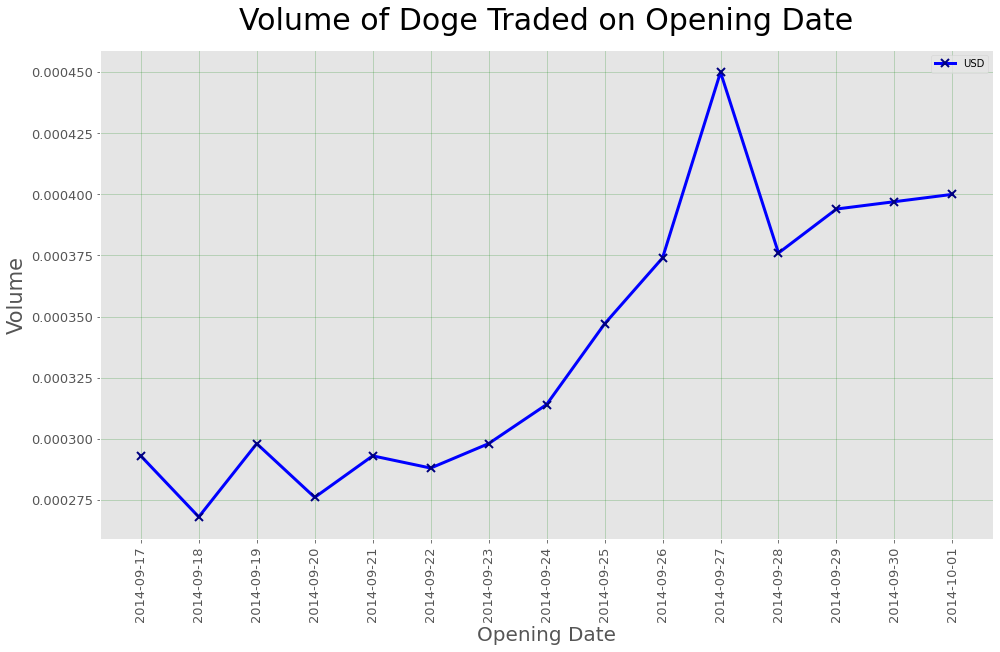

In [15]:
plt.figure(figsize=(16,9))
plt.plot(first_15_days.Date, first_15_days.Open, marker="x", ls="-", lw=3, c="blue", ms=8, mec="navy", mew=2)
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis='y', which="major", labelsize=13)
plt.xlabel("Opening Date", fontsize=20)
plt.ylabel("Volume", fontsize=21)
plt.grid(c='g', alpha=.4, linewidth=.5, linestyle='-')
plt.legend(["USD", "Date"])
plt.title("Volume of Doge Traded on Opening Date", fontsize=30, pad=20)

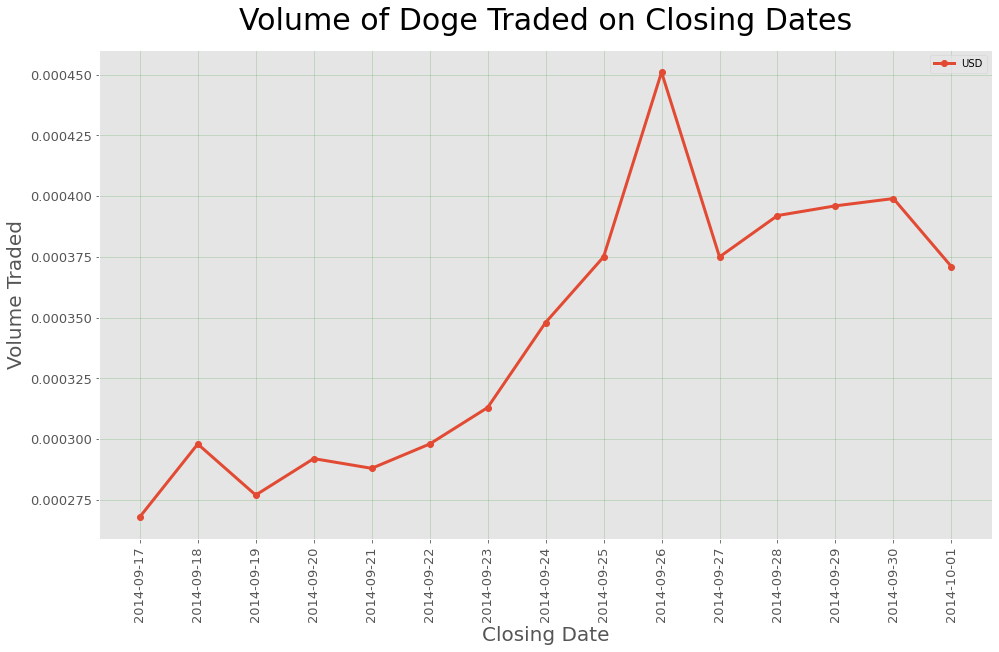

In [16]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(first_15_days.Date, first_15_days.Close, marker='o', lw=3, ls='-')
plt.tick_params(axis='x', labelsize=13, rotation=90)
plt.tick_params(axis='y', labelsize=13)
plt.xlabel("Closing Date", fontsize=20)
plt.ylabel("Volume Traded", fontsize=20)
plt.title("Volume of Doge Traded on Closing Dates", fontsize=30, pad=20)
plt.legend(["USD","Date"])
plt.grid(c="g", alpha=.3, lw=.5, ls='-')

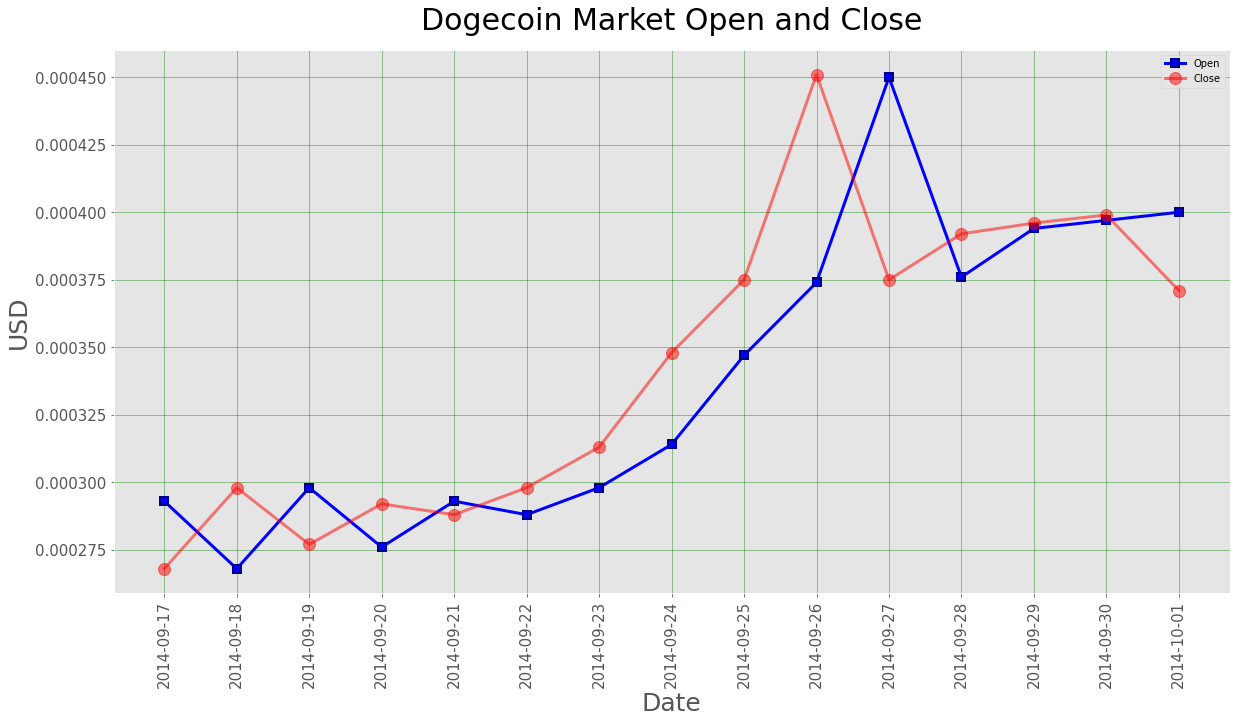

In [17]:
plt.figure(figsize=(20,10))
plt.plot(first_15_days.Date,first_15_days.Open,marker='s',c='b',ls='-',lw=3,ms=8,mew=2,mec='navy')
plt.plot(first_15_days.Date,first_15_days.Close,marker='o',c='r',ls='-',lw=3,ms=12,mew=1,alpha=.5)
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market Open and Close",fontsize = 30,pad=20);
plt.legend(['Open','Close','High','Low']);

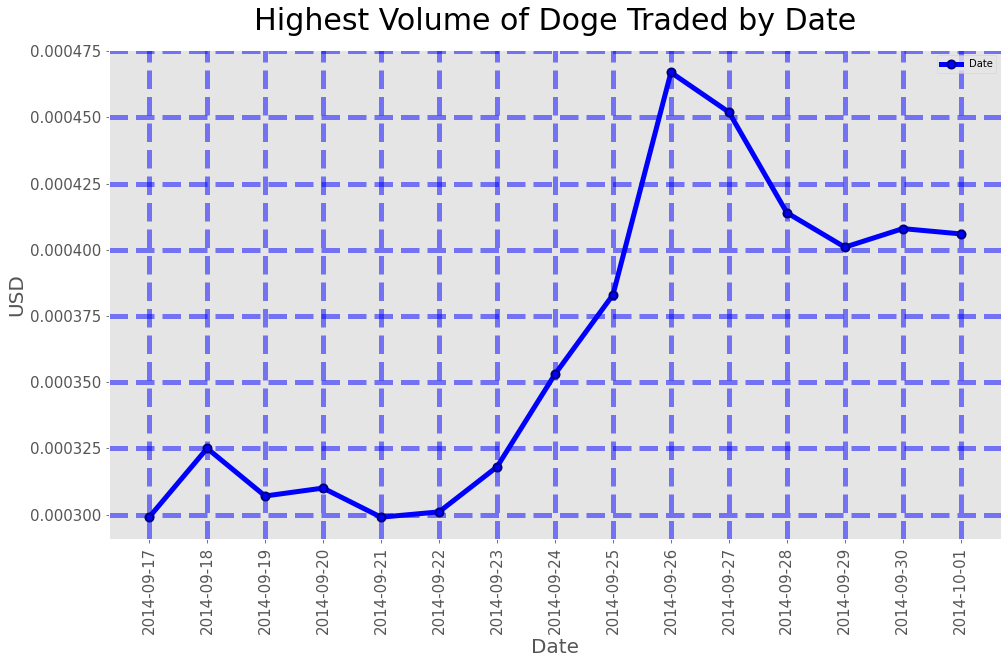

In [18]:
plt.figure(figsize=(16,9))
plt.plot(first_15_days.Date, first_15_days.High, marker='o', lw=5, ls="-", color="b", mew=2, mec="navy", ms=8)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)
plt.grid(alpha=.5, c="b", ls="dashed", lw=5)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Highest Volume of Doge Traded by Date", fontsize=30, pad=20)
plt.legend(["Date", "High"])
plt.show()

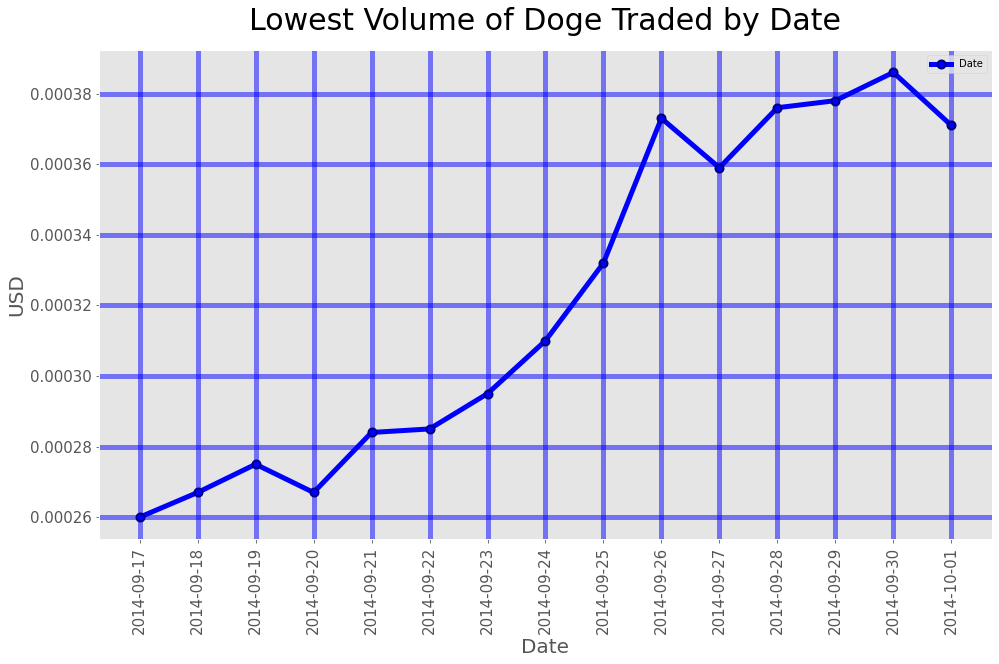

In [19]:
plt.figure(figsize=(16,9))
plt.plot(first_15_days.Date, first_15_days.Low, marker='o', lw=5, ls="-", color="b", mew=2, mec="navy", ms=8)
plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15)
plt.grid(alpha=.5, c="b", ls="solid", lw=5)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Lowest Volume of Doge Traded by Date", fontsize=30, pad=20)
plt.legend(["Date", "Low"])
plt.show()

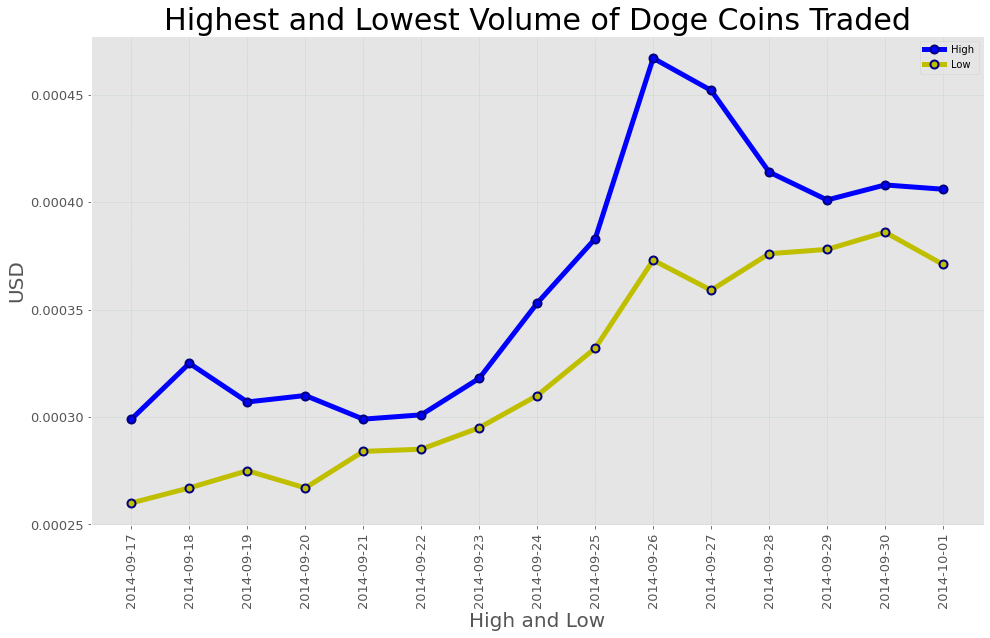

In [20]:
plt.figure(figsize=(16,9))
plt.plot(first_15_days.Date, first_15_days.High, marker='o', lw=5, ls="-", color="b", mew=2, mec="navy", ms=8)
plt.plot(first_15_days.Date, first_15_days.Low, marker='o', lw=5, ls="-", color="y", mew=2, mec="navy", ms=8)
plt.tick_params(axis="x", labelsize=13, rotation=90)
plt.tick_params(axis="y", labelsize=13)
plt.xlabel("High and Low", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Highest and Lowest Volume of Doge Coins Traded", fontsize=30)
plt.grid(c="g", alpha=.3, lw=.5, ls="dotted")
plt.legend(["High", "Low"])
plt.savefig("doge.jpg")

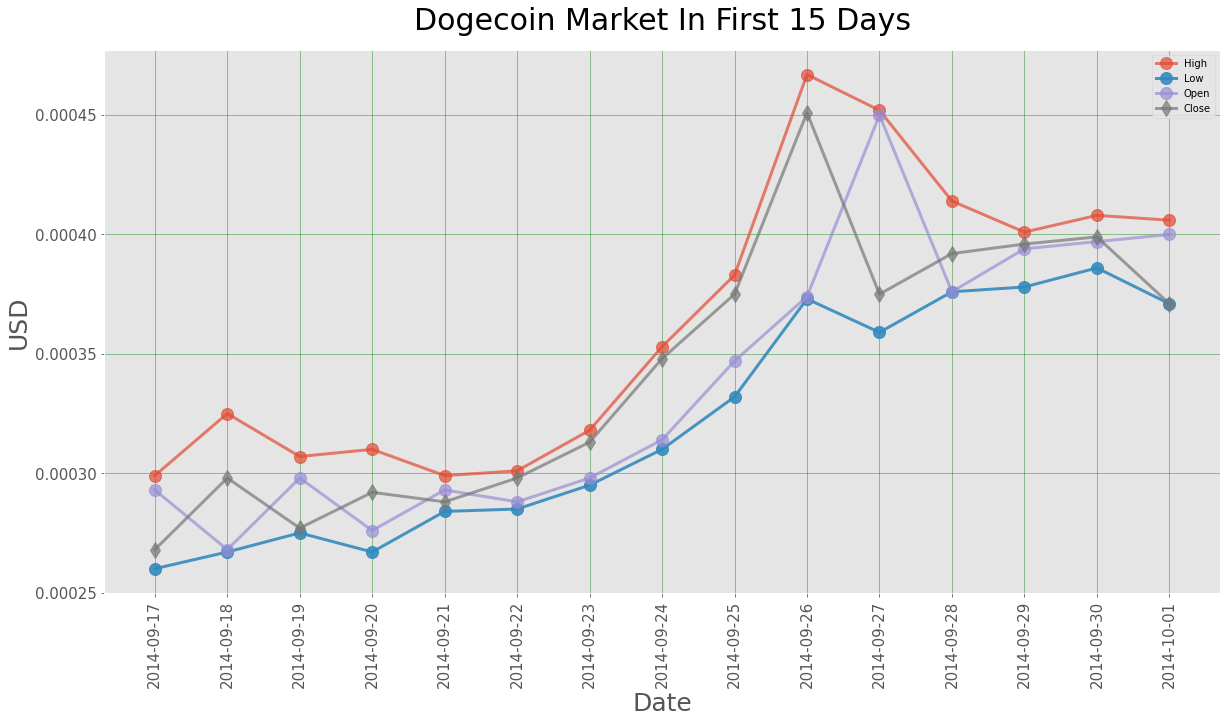

In [21]:
plt.figure(figsize=(20,10))
plt.plot(first_15_days.Date,first_15_days.High,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.plot(first_15_days.Date,first_15_days.Low,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.9);
plt.plot(first_15_days.Date,first_15_days.Open,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7);
plt.plot(first_15_days.Date,first_15_days.Close,marker='d',ls='-',lw=3,ms=12,mew=1,alpha=.7);
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market In First 15 Days",fontsize = 30,pad=20);
plt.legend(['High','Low','Open','Close']);

In [22]:
# Doge's behaviour on the last days of the year
df0=dodge.query('Date =="2014-12-31"')
df1=dodge.query('Date =="2015-12-31"')
df2=dodge.query('Date =="2016-12-31"')
df3=dodge.query('Date =="2017-12-31"')
df4=dodge.query('Date =="2018-12-31"')
df5=dodge.query('Date =="2019-12-31"')
df6=dodge.query('Date =="2020-12-31"')

ds=(df0,df1,df2,df3,df4,df5,df6)
ds

(           Date      Open      High       Low     Close    Volume
 105  2014-12-31  0.000179  0.000187  0.000178  0.000187  314633.0,
            Date      Open      High       Low     Close   Volume
 470  2015-12-31  0.000151  0.000157  0.000147  0.000151  95446.0,
            Date      Open      High       Low     Close   Volume
 836  2016-12-31  0.000227  0.000228  0.000223  0.000223  73496.0,
             Date      Open      High       Low     Close      Volume
 1201  2017-12-31  0.007803  0.009274  0.007669  0.008972  62256400.0,
             Date     Open      High       Low     Close      Volume
 1566  2018-12-31  0.00237  0.002395  0.002325  0.002346  18724788.0,
             Date      Open      High       Low     Close      Volume
 1931  2019-12-31  0.002056  0.002056  0.002022  0.002028  69469785.0,
             Date      Open      High       Low     Close      Volume
 2297  2020-12-31  0.004636  0.004743  0.004553  0.004682  85498337.0)

In [23]:
new1=df0.append(df1)
new2=new1.append(df2)
new3=new2.append(df3)
new4=new3.append(df4)
new5=new4.append(df5)
new6=new5.append(df6)
final_df = new6
final_df

,Date,Open,High,Low,Close,Volume
105,2014-12-31,0.000179,0.000187,0.000178,0.000187,314633.0
470,2015-12-31,0.000151,0.000157,0.000147,0.000151,95446.0
836,2016-12-31,0.000227,0.000228,0.000223,0.000223,73496.0
1201,2017-12-31,0.007803,0.009274,0.007669,0.008972,62256400.0
1566,2018-12-31,0.002370,0.002395,0.002325,0.002346,18724788.0
1931,2019-12-31,0.002056,0.002056,0.002022,0.002028,69469785.0
2297,2020-12-31,0.004636,0.004743,0.004553,0.004682,85498337.0


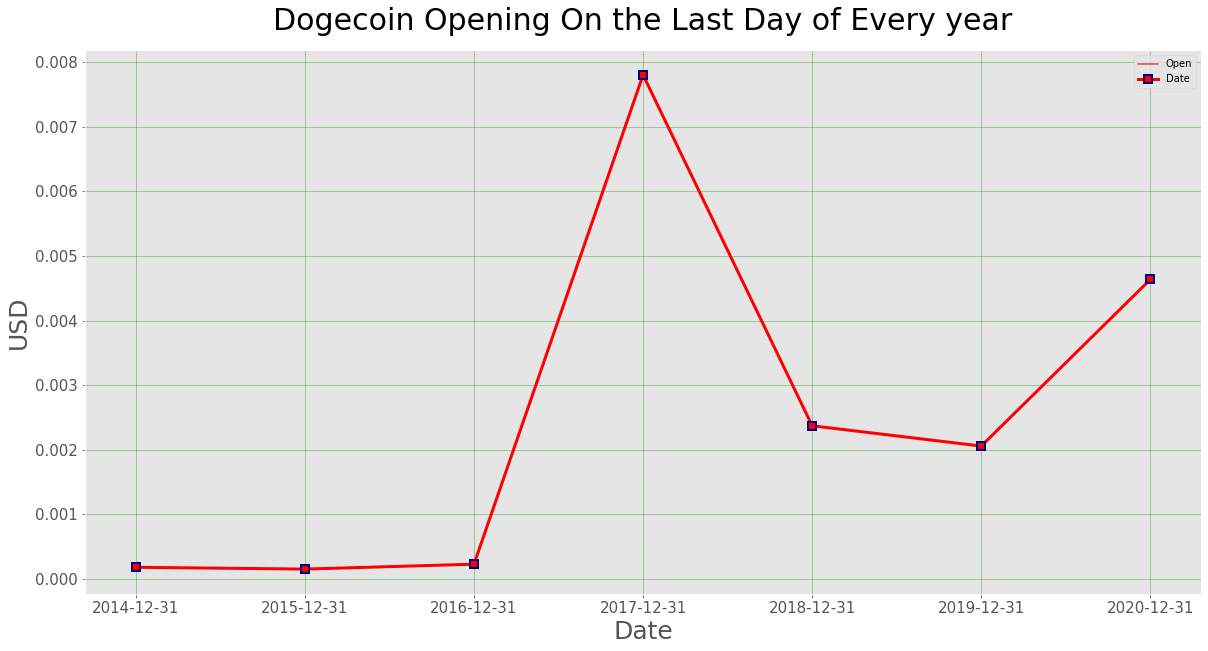

In [24]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.4)
plt.plot(final_df.Date,final_df.Open)
plt.plot(final_df.Date,final_df.Open,marker='s',c='r',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize=25)
plt.ylabel('USD',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Opening On the Last Day of Every year",fontsize=30,pad=20);
plt.legend(['Open','Date']);

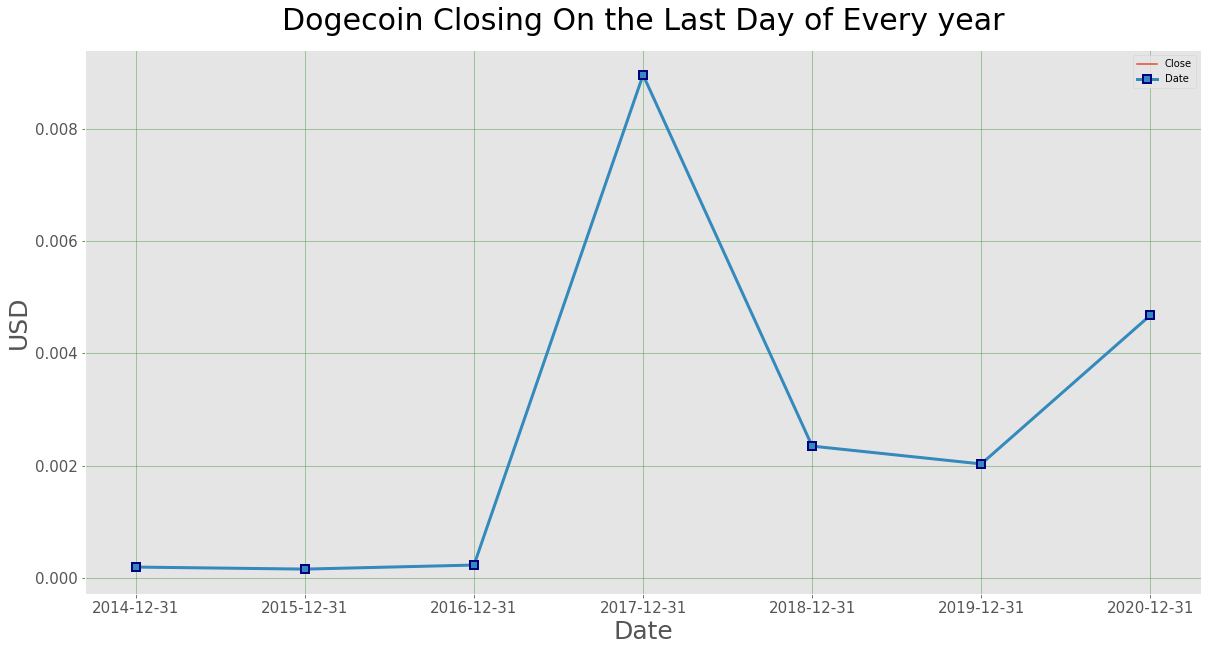

In [25]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.4)
plt.plot(final_df.Date,final_df.Close)
plt.plot(final_df.Date,final_df.Close,marker='s',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize=25)
plt.ylabel('USD',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Closing On the Last Day of Every year",fontsize=30,pad=20);
plt.legend(['Close','Date']);

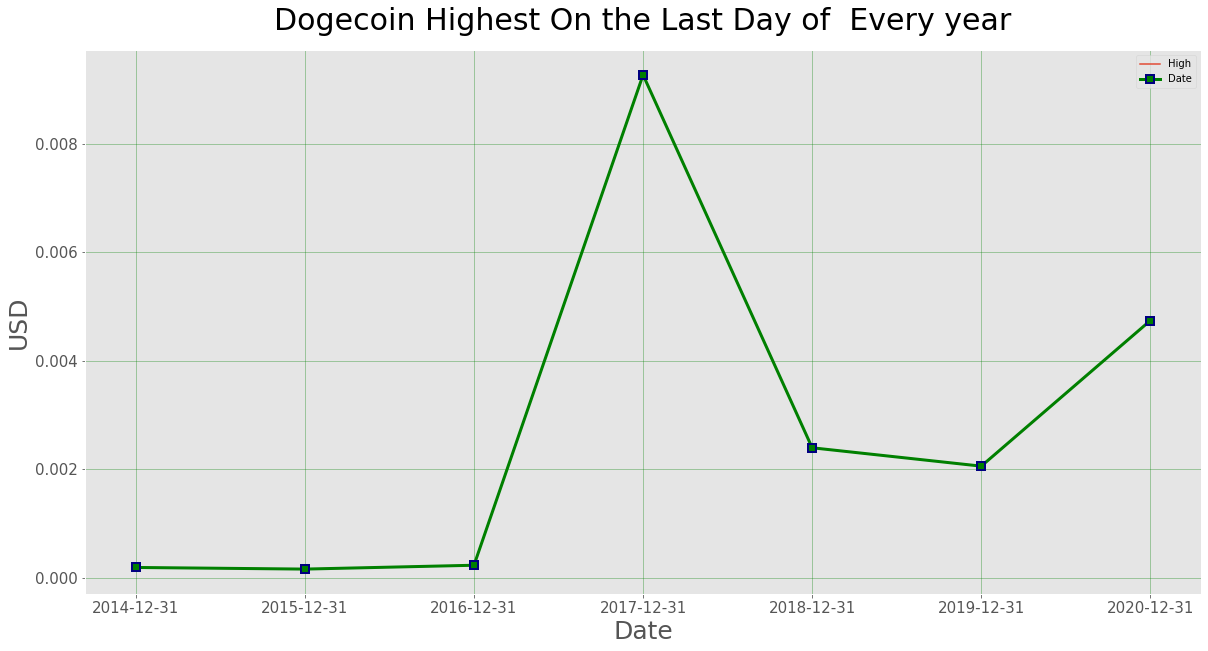

In [26]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.4)
plt.plot(final_df.Date,final_df.High)
plt.plot(final_df.Date,final_df.High,marker='s',c='g',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize=25)
plt.ylabel('USD',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Highest On the Last Day of  Every year",fontsize=30,pad=20);
plt.legend(['High','Date']);

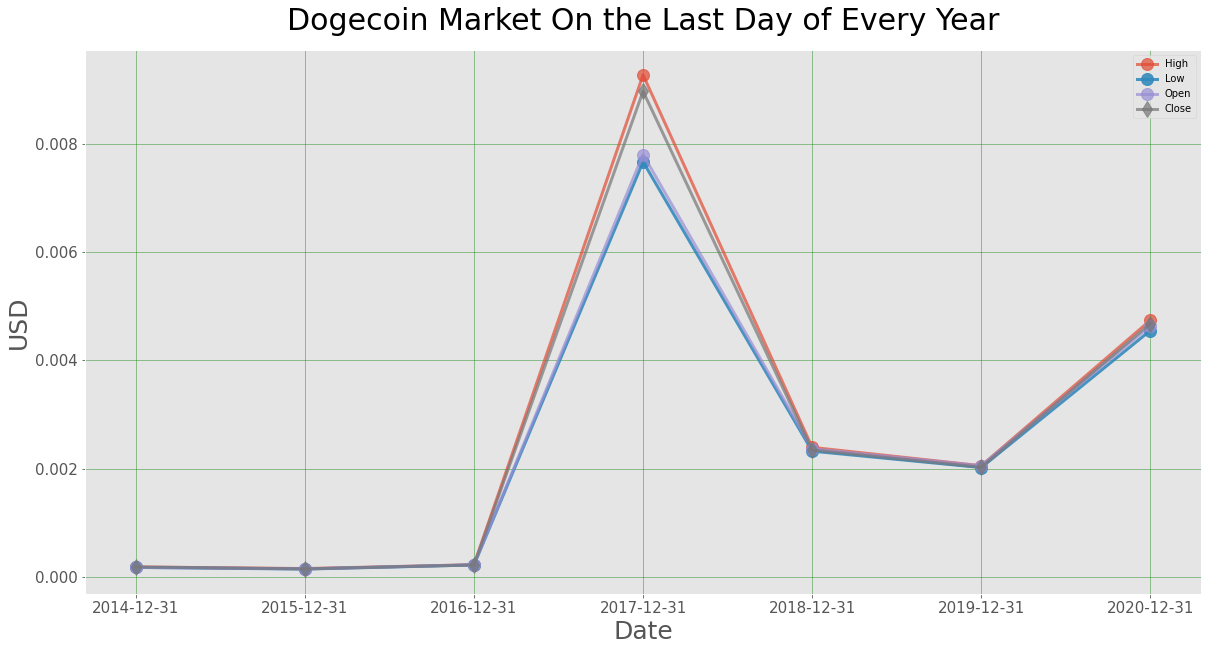

In [27]:
plt.figure(figsize=(20,10))
plt.plot(final_df.Date,final_df.High,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.plot(final_df.Date,final_df.Low,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.9)
plt.plot(final_df.Date,final_df.Open,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.plot(final_df.Date,final_df.Close,marker='d',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market On the Last Day of Every Year",fontsize = 30,pad=20);
plt.legend(['High','Low','Open','Close']);

In [28]:
# Doge behaviour on the first and last date of the dataset
d0=dodge.query('Date =="2014-09-17"')
d1=dodge.query('Date =="2021-06-05"')
d0,d1

(         Date      Open      High      Low     Close     Volume
 0  2014-09-17  0.000293  0.000299  0.00026  0.000268  1463600.0,
             Date      Open      High       Low     Close        Volume
 2453  2021-06-05  0.376752  0.393886  0.360488  0.372177  3.464039e+09)

In [29]:
data_diff=d0.append(d1)

In [30]:
data_diff

,Date,Open,High,Low,Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,1.463600e+06
2453,2021-06-05,0.376752,0.393886,0.360488,0.372177,3.464039e+09


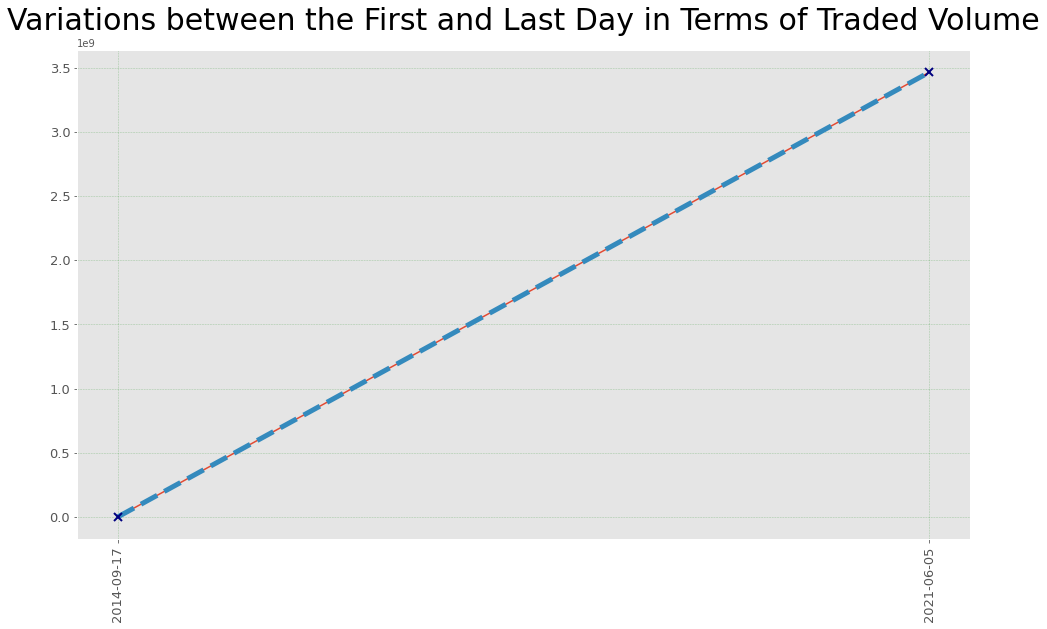

In [31]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(data_diff.Date, data_diff.Volume)
plt.plot(data_diff.Date, data_diff.Volume, marker="x", ls="--", lw=5, mec="navy", ms=8, mew=2)
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major",labelsize=13)
plt.grid(lw=.5, alpha=.3, c="g", ls="dashed")
plt.title("Variations between the First and Last Day in Terms of Traded Volume", fontsize=30, pad=20)
plt.show()

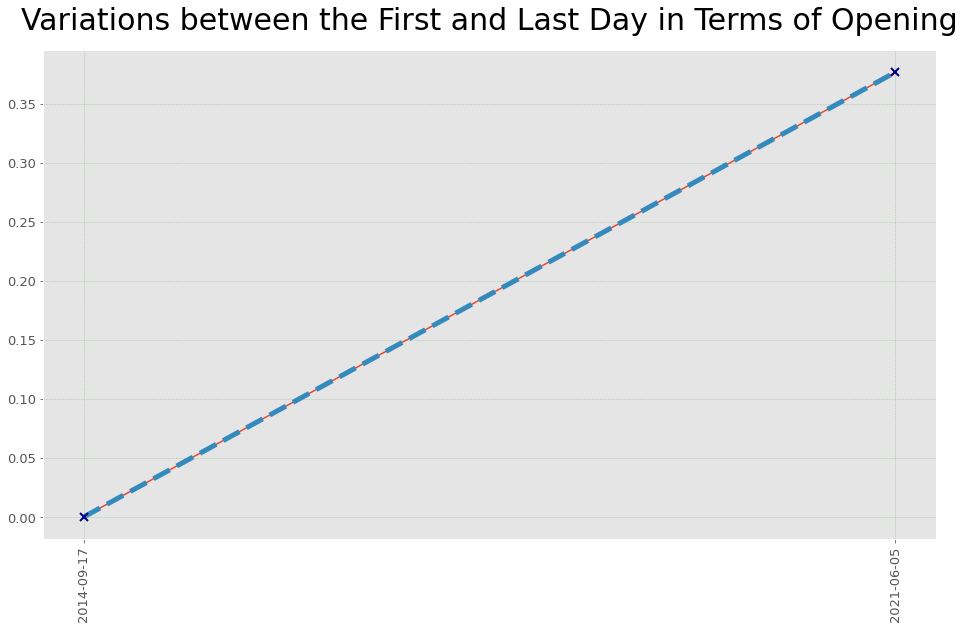

In [32]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(data_diff.Date, data_diff.Open)
plt.plot(data_diff.Date, data_diff.Open, marker="x", ls="--", lw=5, mec="navy", ms=8, mew=2)
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major",labelsize=13)
plt.grid(lw=.5, alpha=.3, c="g", ls="dashed")
plt.title("Variations between the First and Last Day in Terms of Opening", fontsize=30, pad=20)
plt.show()

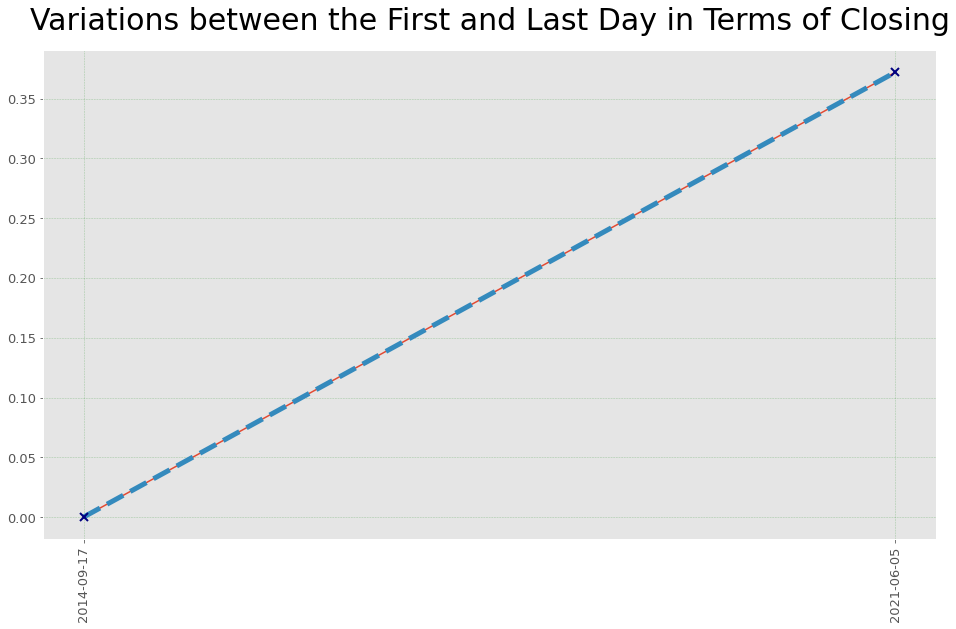

In [33]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(data_diff.Date, data_diff.Close)
plt.plot(data_diff.Date, data_diff.Close, marker="x", ls="--", lw=5, mec="navy", ms=8, mew=2)
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major",labelsize=13)
plt.grid(lw=.5, alpha=.3, c="g", ls="dashed")
plt.title("Variations between the First and Last Day in Terms of Closing", fontsize=30, pad=20)
plt.show()

Text(0.5, 1.0, 'Highest Doge Traded in USD')

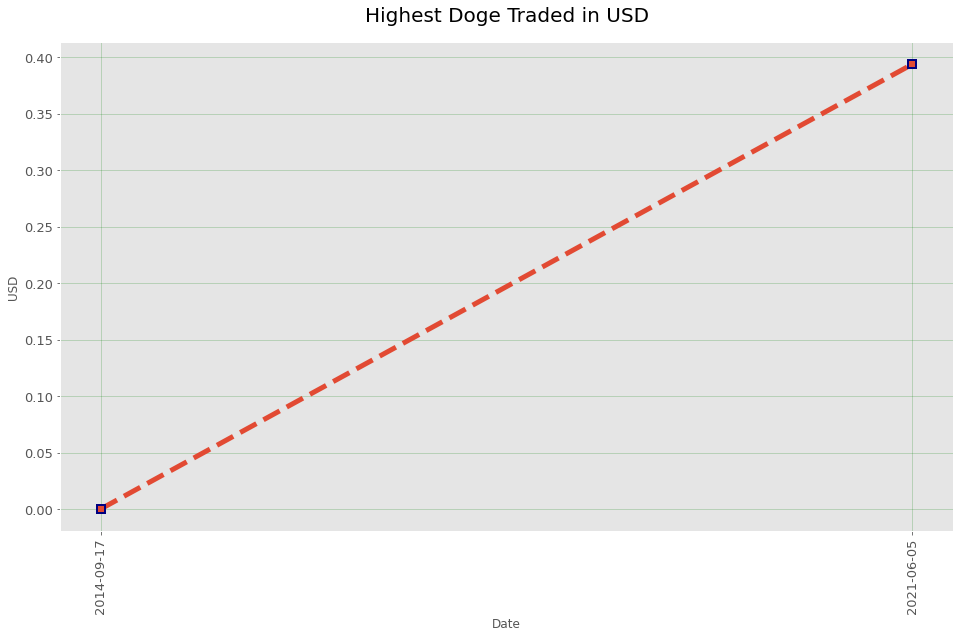

In [34]:
plt.figure(figsize=(16,9))
plt.plot(data_diff.Date, data_diff.High, marker='s', mec="navy", ms=8,ls="--", lw=5, mew=2)
plt.tick_params(axis="x", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.grid(c="g", ls='-',lw=.5, alpha=.4)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("Highest Doge Traded in USD", fontsize=20, pad=20)

Text(0.5, 1.0, 'Lowest Doge Traded in USD')

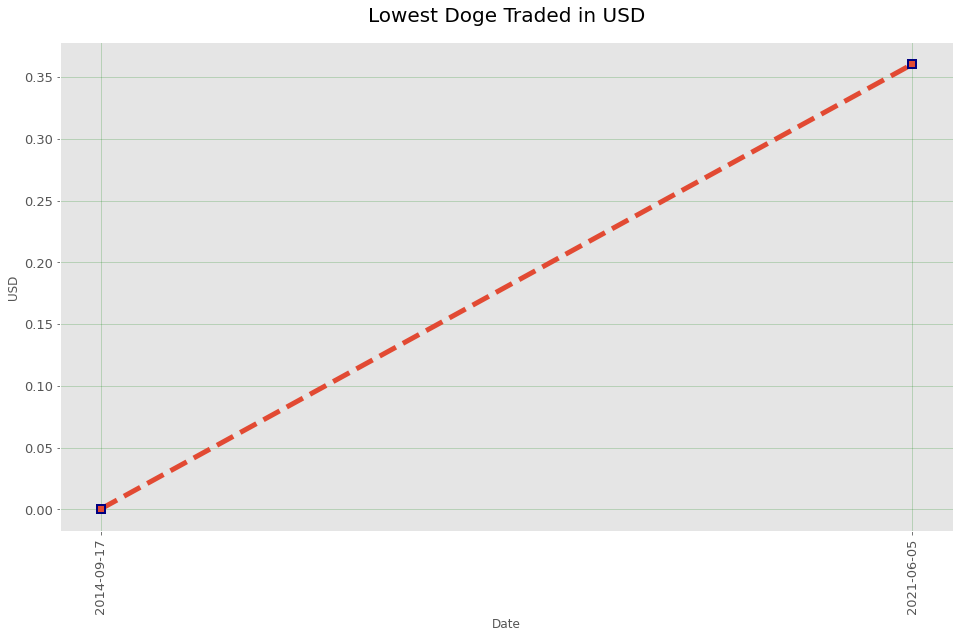

In [35]:
plt.figure(figsize=(16,9))
plt.plot(data_diff.Date, data_diff.Low, marker='s', mec="navy", ms=8,ls="--", lw=5, mew=2)
plt.tick_params(axis="x", which="major",labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.grid(c="g", ls='-',lw=.5, alpha=.4)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("Lowest Doge Traded in USD", fontsize=20, pad=20)

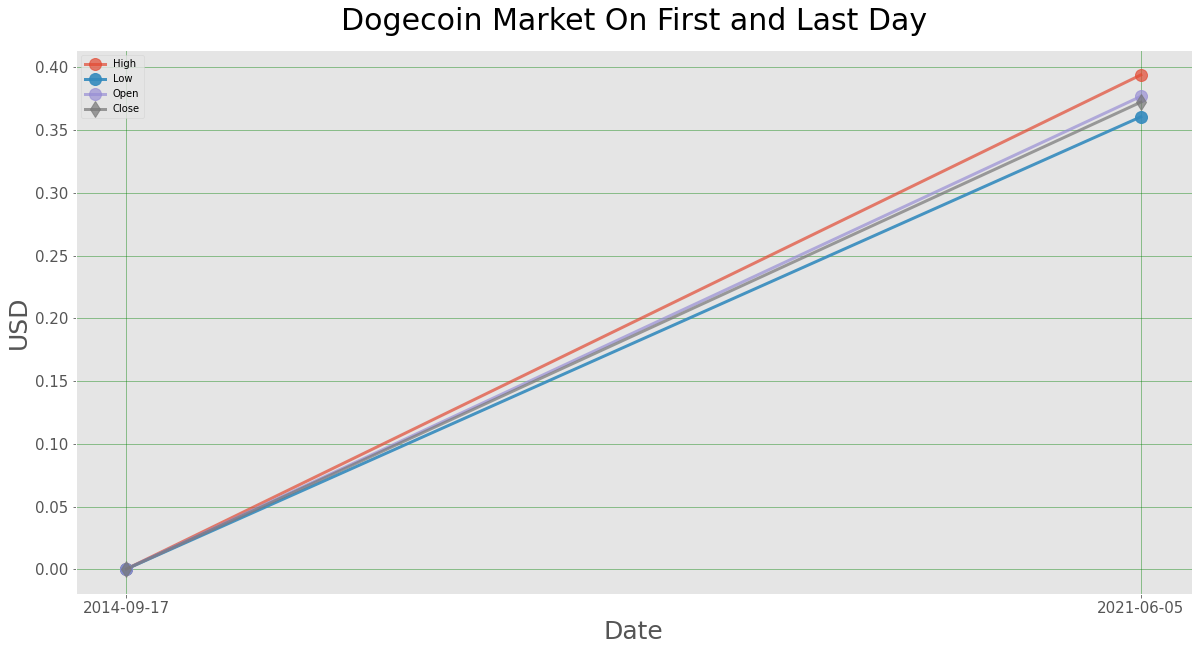

In [36]:
plt.figure(figsize=(20,10))
plt.plot(data_diff.Date,data_diff.High,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.plot(data_diff.Date,data_diff.Low,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.9)
plt.plot(data_diff.Date,data_diff.Open,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.plot(data_diff.Date,data_diff.Close,marker='d',ls='-',lw=3,ms=12,mew=1,alpha=.7)
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market On First and Last Day",fontsize = 30,pad=20);
plt.legend(['High','Low','Open','Close']);

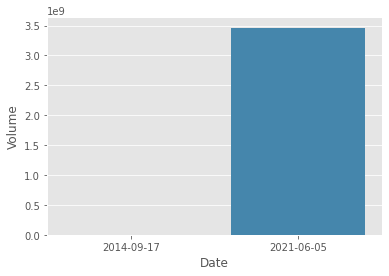

In [37]:
sns.barplot(x = 'Date',  y ='Volume', data = data_diff);

In [38]:
tail_df=dodge.tail(20)
tail_df

,Date,Open,High,Low,Close,Volume
2623,2021-11-22,0.226160,0.227531,0.216898,0.219676,9.217537e+08
2624,2021-11-23,0.219666,0.236201,0.214566,0.226512,1.907279e+09
2625,2021-11-24,0.226680,0.230245,0.211836,0.221825,1.957665e+09
2626,2021-11-25,0.217132,0.228810,0.214317,0.216326,1.344827e+09
2627,2021-11-26,0.221047,0.221759,0.190344,0.200887,2.231733e+09
2628,2021-11-27,0.201429,0.209613,0.200871,0.205347,9.177856e+08
2629,2021-11-28,0.205295,0.207472,0.193064,0.207472,1.027555e+09
2630,2021-11-29,0.207444,0.223692,0.203252,0.215175,1.869738e+09
2631,2021-11-30,0.215111,0.226890,0.213251,0.214715,1.897636e+09
2632,2021-12-01,0.214487,0.218496,0.206298,0.209487,9.880309e+08


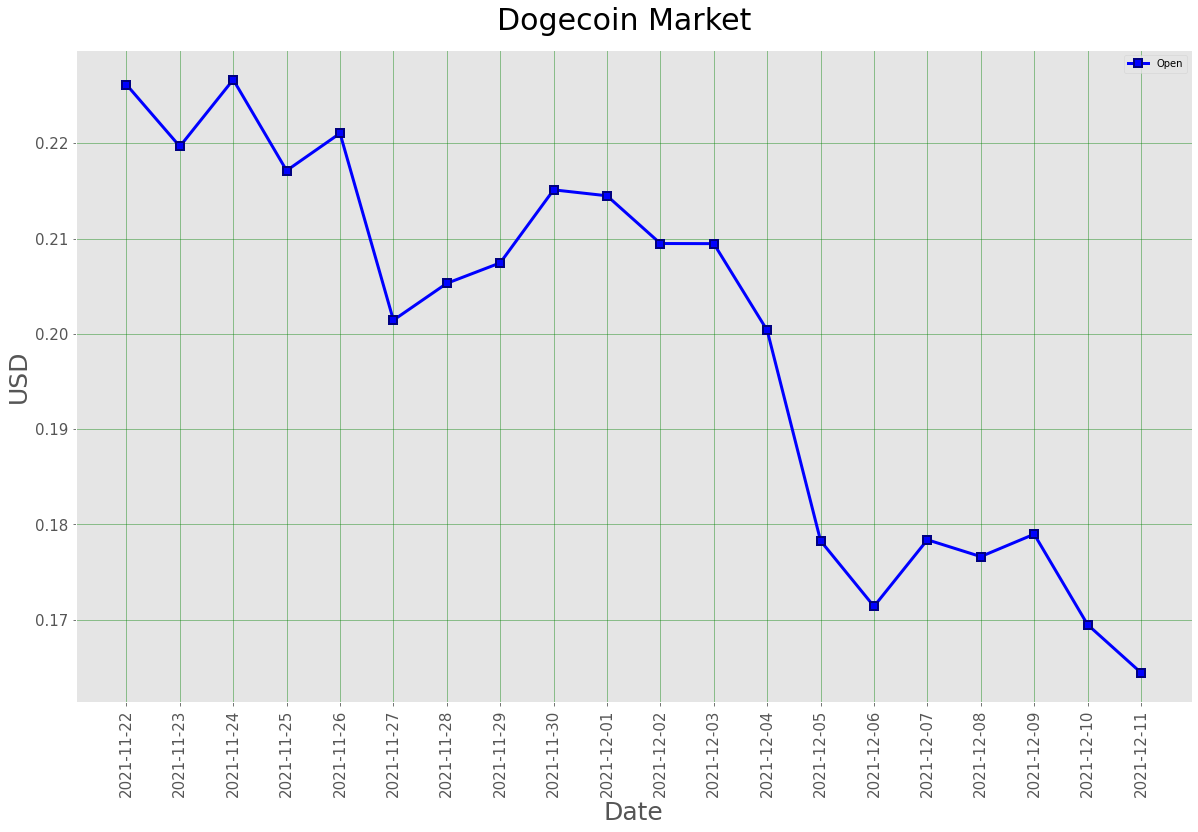

In [39]:
#What Was the Opening Of Dogecoin Market in Past 1 Months?
plt.figure(figsize=(20,12))
plt.plot(tail_df.Date,tail_df.Open,marker='s',c='b',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market  ",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Open','Date']);

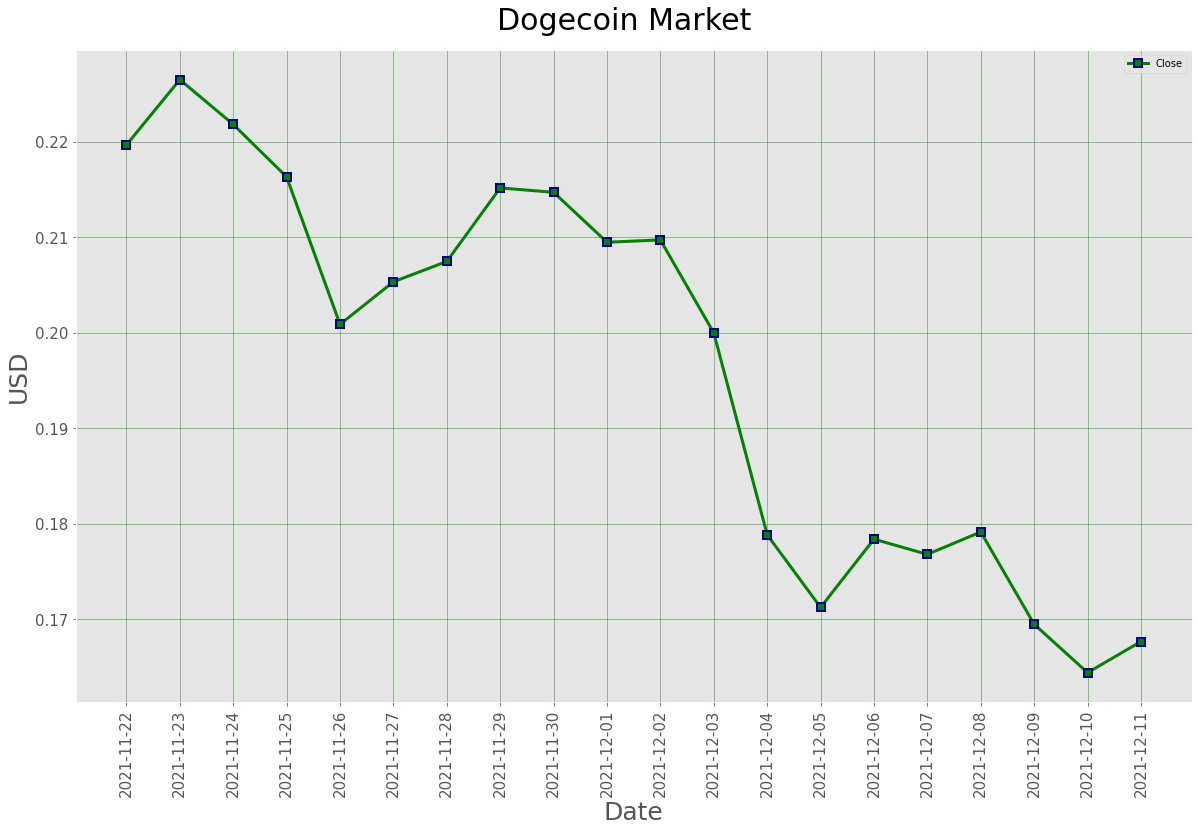

In [40]:
#What Was the Opening Of Dogecoin Market in Past 1 Months?
plt.figure(figsize=(20,12))
plt.plot(tail_df.Date,tail_df.Close,marker='s',c='g',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Market  ",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Close','Date']);

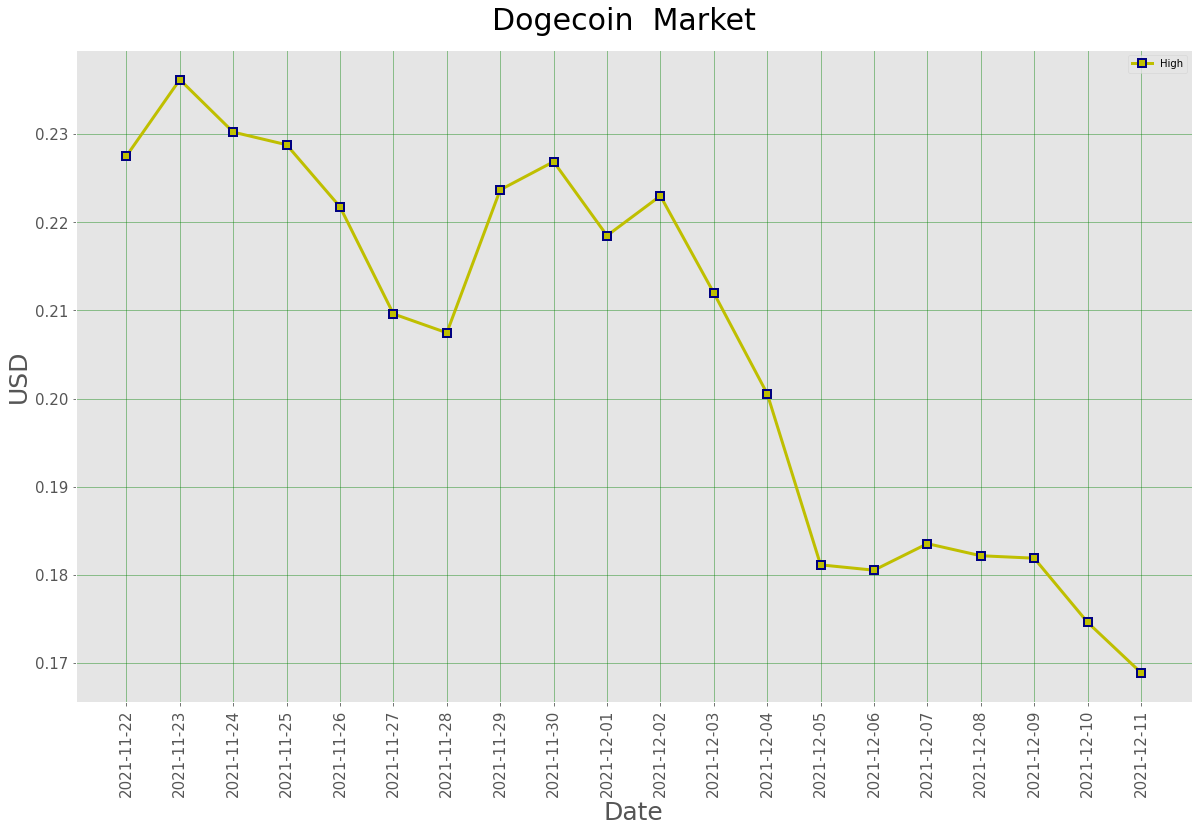

In [41]:
#What Was the Highest Of Dogecoin Market in Past 1 Months?
plt.figure(figsize=(20,12))
plt.plot(tail_df.Date,tail_df.High,marker='s',c='y',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin  Market  ",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['High','Date']);

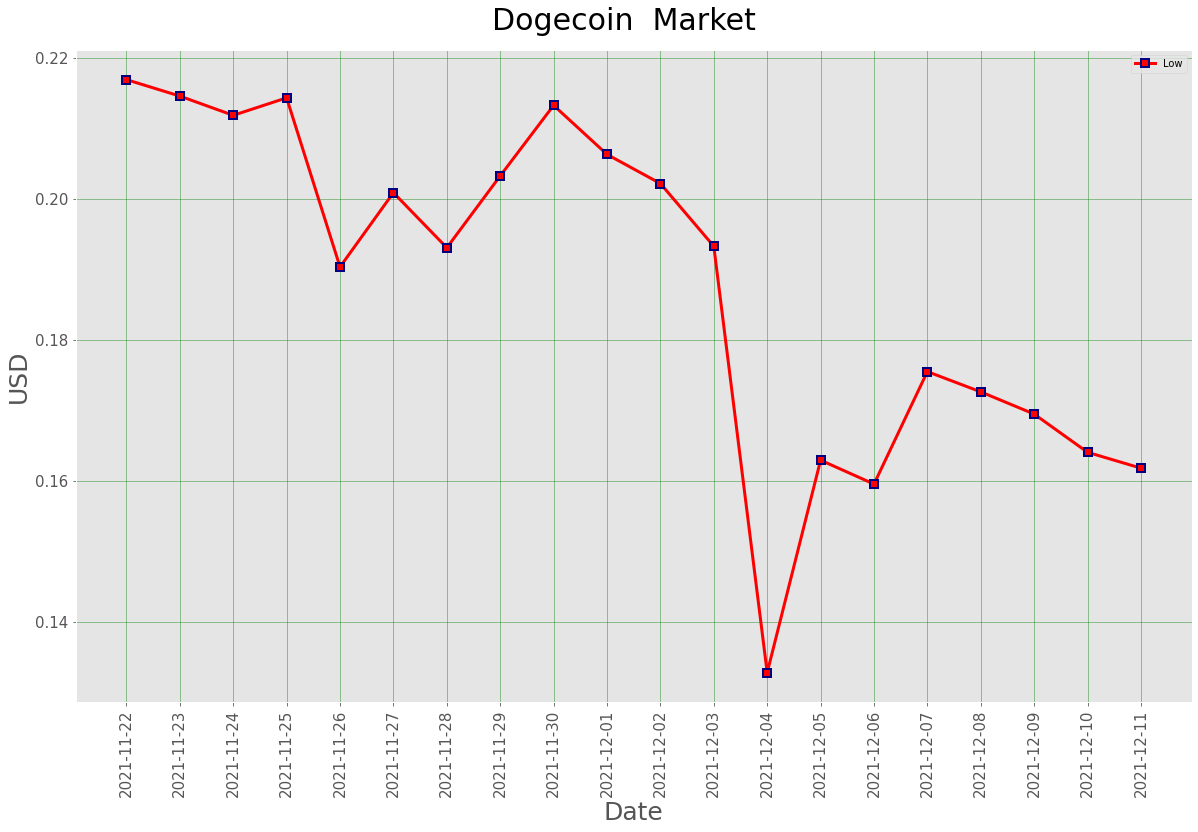

In [42]:
#What Was the Lowest Of Dogecoin Market in Past 1 Months?
plt.figure(figsize=(20,12))
plt.plot(tail_df.Date,tail_df.Low,marker='s',c='r',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin  Market  ",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Low','Date']);

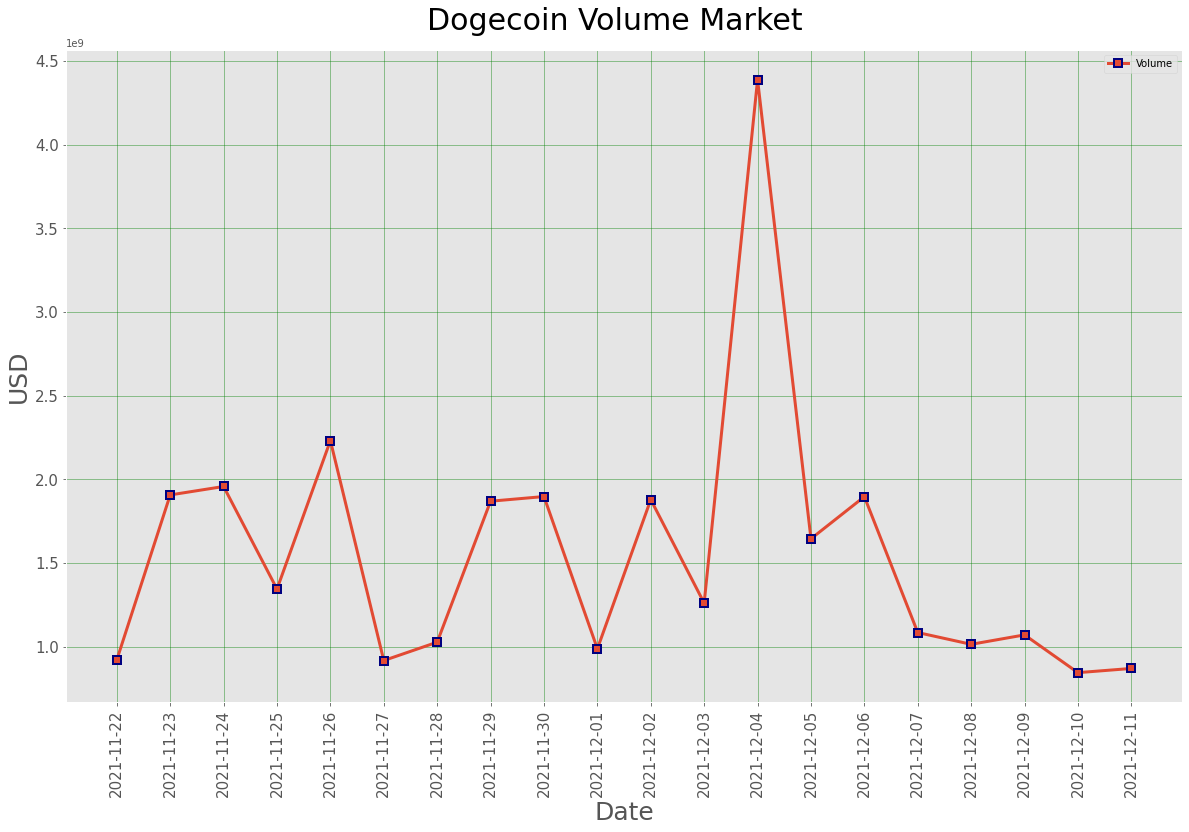

In [43]:
#What Was the Lowest Of Dogecoin Market in Past 1 Months?
plt.figure(figsize=(20,12))
plt.plot(tail_df.Date,tail_df.Volume,marker='s',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin Volume Market  ",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Volume','Date']);

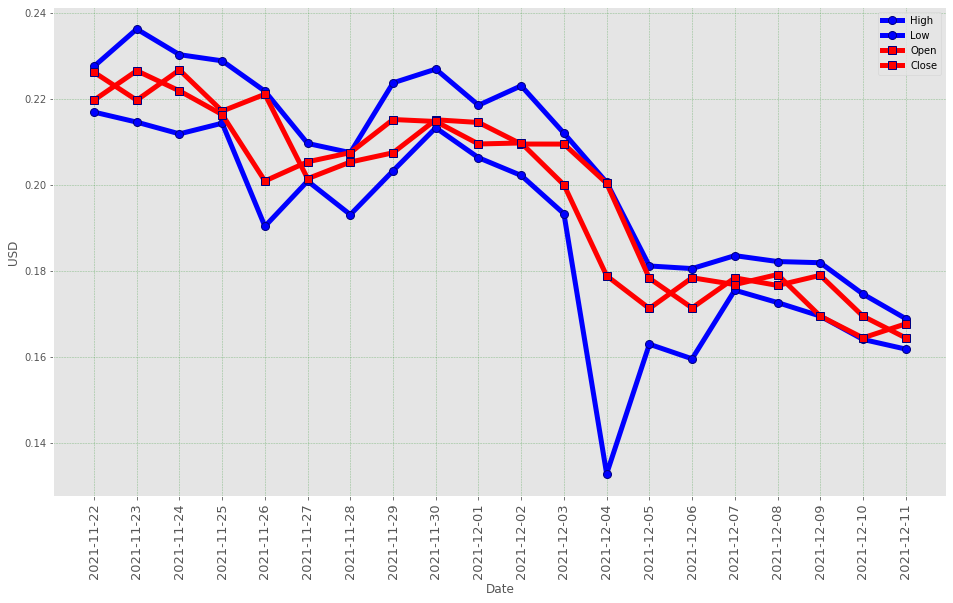

In [44]:
plt.figure(figsize=(16,9))
plt.plot(tail_df.Date, tail_df.High, marker="o", c="b", ls="-", lw=5, ms=8, mec="navy", mew=1)
plt.plot(tail_df.Date, tail_df.Low, marker="o", c="b", ls="-", lw=5, ms=8, mec="navy", mew=1)
plt.plot(tail_df.Date, tail_df.Open, marker="s", c="r", ls="-", lw=5, ms=8, mec="navy", mew=1)
plt.plot(tail_df.Date, tail_df.Close, marker="s", c="r", ls="-", lw=5, ms=8, mec="navy", mew=1)
plt.xlabel("Date")
plt.ylabel("USD")
plt.grid(c="g", ls="--", lw=.5, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="x", which="major", labelsize=13)
plt.legend(["High","Low","Open","Close"])

## **Market Trend on Every Last day of the year**

In [45]:
dodge.Date = pd.to_datetime(dodge.Date)

In [46]:
dodge.Day = dodge.Date.dt.day

In [47]:
dodge.Month = dodge.Date.dt.month

In [48]:
dodge.Year = dodge.Date.dt.year

In [49]:
import numpy as np
rec = dodge.loc[np.where((dodge.Month == 12) & (dodge.Day == 31))]

In [50]:
rec

,Date,Open,High,Low,Close,Volume
105,2014-12-31,0.000179,0.000187,0.000178,0.000187,314633.0
470,2015-12-31,0.000151,0.000157,0.000147,0.000151,95446.0
836,2016-12-31,0.000227,0.000228,0.000223,0.000223,73496.0
1201,2017-12-31,0.007803,0.009274,0.007669,0.008972,62256400.0
1566,2018-12-31,0.002370,0.002395,0.002325,0.002346,18724788.0
1931,2019-12-31,0.002056,0.002056,0.002022,0.002028,69469785.0
2297,2020-12-31,0.004636,0.004743,0.004553,0.004682,85498337.0


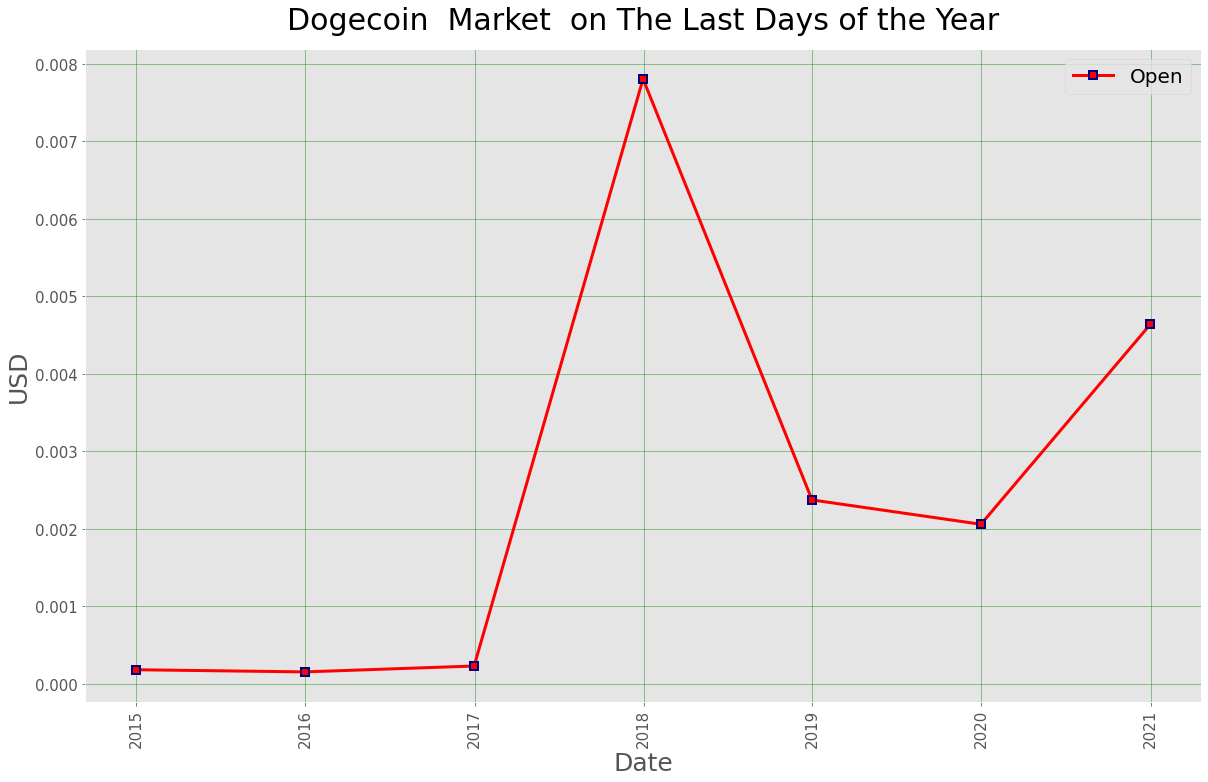

In [51]:
plt.figure(figsize=(20,12))
plt.plot(rec.Date,rec.Open,marker='s',c='r',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin  Market  on The Last Days of the Year",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Open'], fontsize=20);

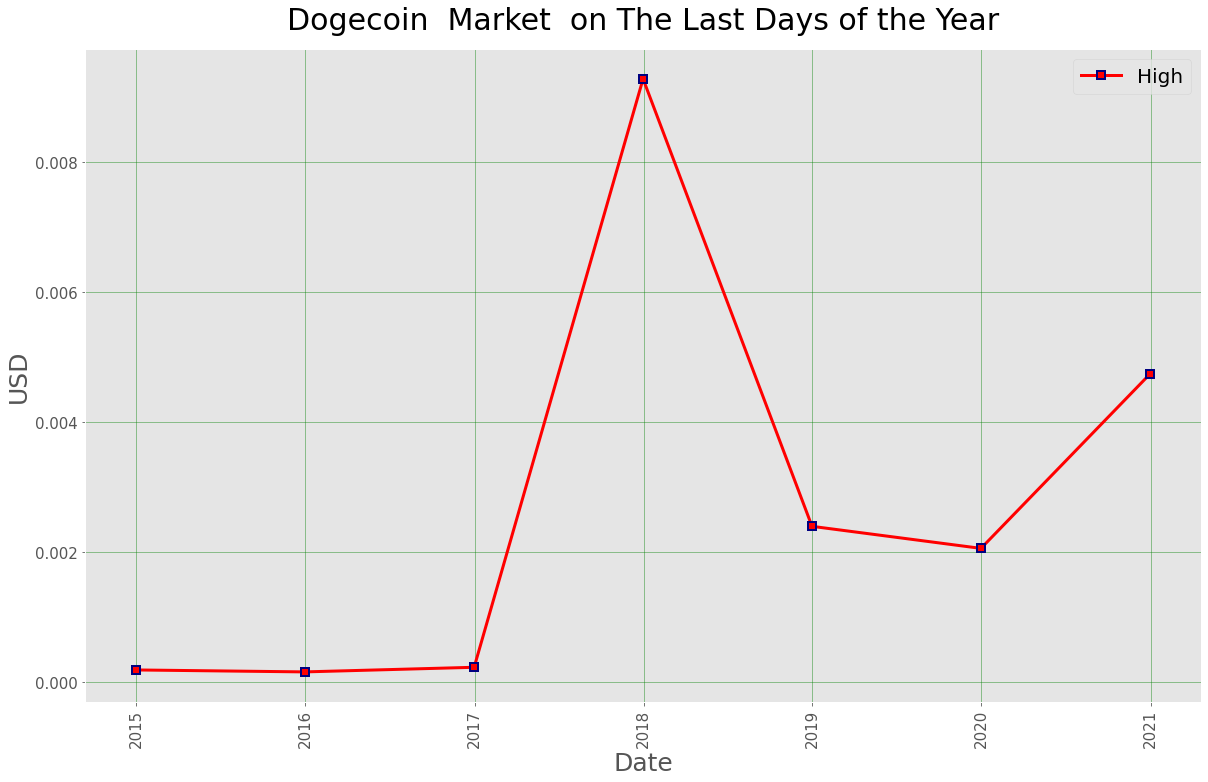

In [52]:
plt.figure(figsize=(20,12))
plt.plot(rec.Date,rec.High,marker='s',c='r',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin  Market  on The Last Days of the Year",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['High'], fontsize=20);

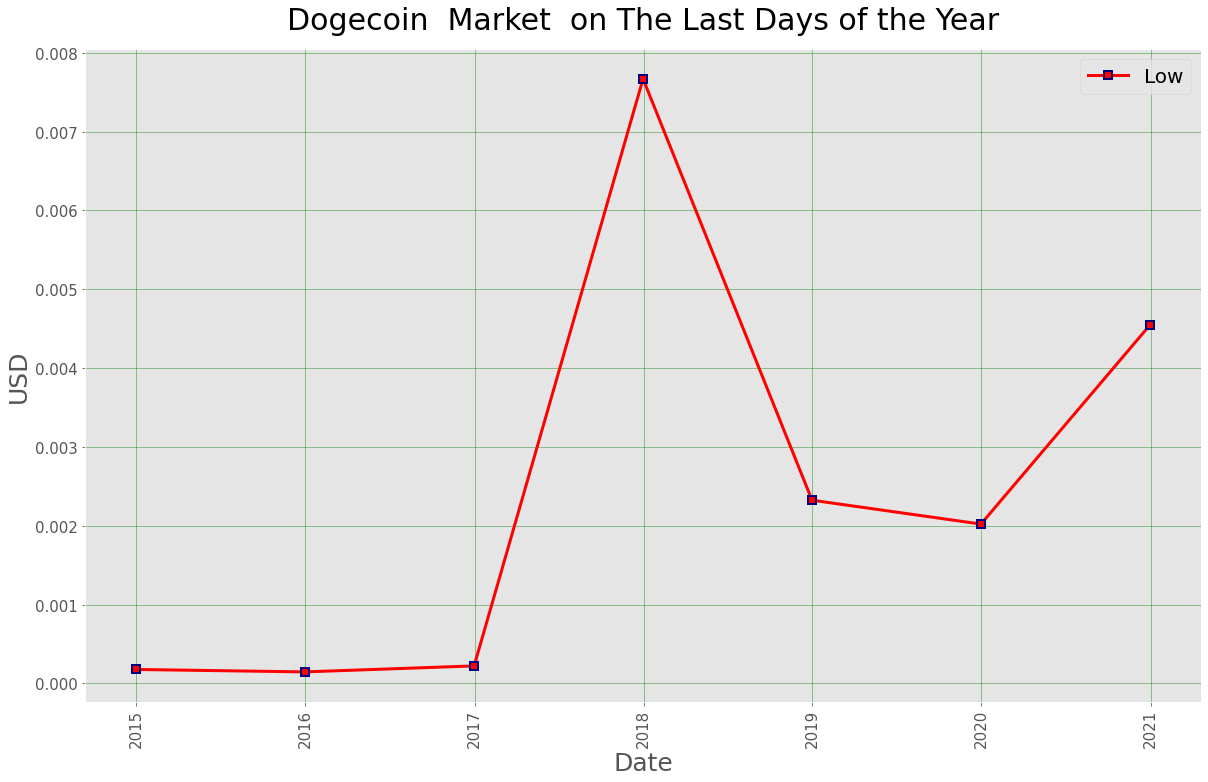

In [53]:
plt.figure(figsize=(20,12))
plt.plot(rec.Date,rec.Low,marker='s',c='r',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin  Market  on The Last Days of the Year",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Low'], fontsize=20);

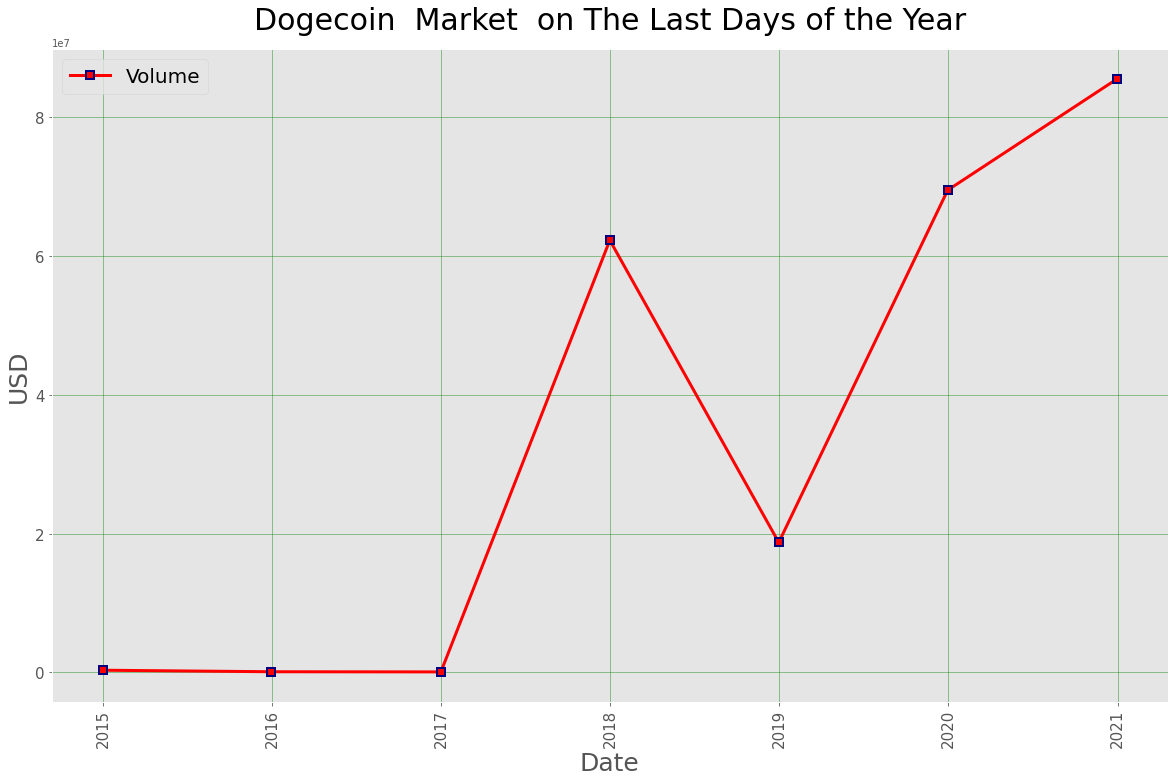

In [54]:
plt.figure(figsize=(20,12))
plt.plot(rec.Date,rec.Volume,marker='s',c='r',ls='-',lw=3,ms=8,mew=2,mec='navy');
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Dogecoin  Market  on The Last Days of the Year",fontsize=30, pad=20);
plt.grid(color='g', linestyle='-', linewidth=0.8,alpha=0.5)
plt.legend(['Volume'], fontsize=20);